In [1]:
using SymPy
using Plots
pyplot();

In [2]:
f_MEG,Rl,Ll,Cp,Cl = symbols("f_MEG,Rl,Ll,Xp,Cl",real=true);

In [5]:
w = 1e6*f_MEG*2*pi;

In [31]:
Rl=10;
Ll = 247e-9;
Z0 = 50;
Lpreamp = 100/(123.25e6*2*pi);

In [8]:
Cp=1/(2*pi*123.25e6)/sqrt(Rl/Z0*(Xpreamp^2+Z0^2))

2.582635993377612e-11

In [9]:
Cl = 1/(2*pi*123.25e6)/(2*pi*123.25e6*Ll+Rl*Xpreamp/Z0-sqrt(Rl/Z0*(Xpreamp^2+Z0^2)))

8.006811123806354e-12

In [10]:
Cm = 1/(2*pi*123.25e6)/(Xpreamp-sqrt(Rl/Z0*(Xpreamp^2+Z0^2)))

2.582635993377612e-11

In [29]:
Xs=w*Ll-1/(w*Cl);
Xp = -1/(w*Cp);
Xm = -1/(w*Cm);
Xpreamp = w*Lpreamp;

0.258263599337761*pi*f_MEG

In [32]:
Zin = 1/(1/(1im*Xp)+1/(1im*Xs+Rl)) +1im*Xm ;

In [33]:
Rin = simplify(real(Zin));

In [34]:
Xin = simplify(imag(Zin));

In [35]:
anno = [
    (123.25e6,Xin(123.25e6),text("foo",:bottom,:courier"))
    (123.25e6,Rin(123.25e6)*0.8,text("bar",:bottom))

]

LoadError: LoadError: syntax: incomplete: invalid string syntax
while loading In[35], in expression starting on line 1

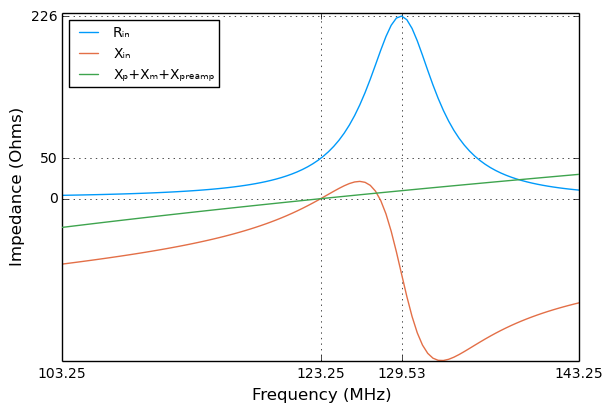

In [63]:
xmin = 103.25;
xmax = 143.25;
f_50 = N(nsolve(Rin-50,f_MEG,120))
f_0 = N(nsolve(Xp+Xs,f_MEG,120))

plot(Rin(f_MEG),label="Rᵢₙ",xmin,xmax,xaxis=())
plot!(Xin(f_MEG),label="Xᵢₙ",xmin,xmax)
plot!(Xp(f_MEG)+Xm+Xpreamp,label="Xₚ+Xₘ+Xₚᵣₑₐₘₚ",xmin,xmax)
#plot!(margin=10)

xticks!(round([xmin,f_0,f_50,xmax],2))
yticks!(round(Int,[N(Xin(f_50)),N(Rin(f_50)),N(Rin(f_0))]))

plot!(tickfont=Plots.Font("sans-serif",10,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)))
plot!(guidefont=Plots.Font("sans-serif",12,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)))
plot!(legendfont=Plots.Font("sans-serif",10,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)))
plot!(ylims=(-Inf,230))

xlabel!("Frequency (MHz)")
ylabel!("Impedance (Ohms)")

savefig("plot.svg")